In [115]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline


In [88]:
data=pd.read_csv("churn_prediction.csv")
data.shape

(28382, 21)

In [89]:
data.drop(['customer_id'],axis=1,inplace=True)
data.drop(['gender'],axis=1,inplace=True)
data.shape

(28382, 19)

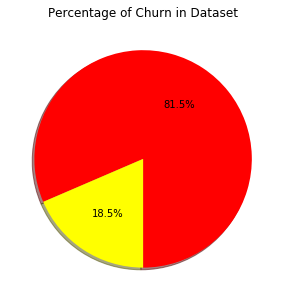

In [90]:
sizes = data['churn'].value_counts(sort = True)
colors = ["red","yellow"] 
rcParams['figure.figsize'] = 5,5

plt.pie(sizes,colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [91]:
data['dependents'] = pd.to_numeric(data['dependents'])

In [92]:
data = pd.get_dummies(data, columns=['occupation'])
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,7799.26,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,4910.17,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,478,90,NaN,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [95]:
data.shape

(28382, 23)

In [96]:
data['city'] = pd.to_numeric(data['city'])

In [97]:
data['days_since_last_transaction'] = pd.to_numeric(data['days_since_last_transaction'])

In [104]:
data['dependents'].fillna("0",inplace=True)

In [100]:
data["city"].fillna((data['city'].mean()),inplace=True)
data["city"].head()


0     187.000000
1     796.109576
2     146.000000
3    1020.000000
4    1494.000000
Name: city, dtype: float64

In [101]:
data['days_since_last_transaction'].fillna((data['days_since_last_transaction'].mean()),inplace=True)
data['days_since_last_transaction'].head()

0    224.000000
1     60.000000
2     69.997814
3    147.000000
4     58.000000
Name: days_since_last_transaction, dtype: float64

In [105]:
data.dtypes

vintage                             int64
age                                 int64
dependents                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried                 uint8
occupation_self_employed            uint8
occupation_student                  uint8
dtype: object

In [106]:
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,0,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,310,35,0,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,2356,31,0,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,478,90,0.0,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,2531,42,2,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [107]:
data.isnull().sum()

vintage                           0
age                               0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
occupation_company                0
occupation_retired                0
occupation_salaried               0
occupation_self_employed          0
occupation_student                0
dtype: int64

# Splitting the data 

In [118]:
data["churn"] = data["churn"].astype(int)
Y = data["churn"].values
X = data.drop(labels = ["churn"],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\users\dell\desktop\minor2020\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediction Accuracy

In [120]:
from sklearn import metrics
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test))

0.8268937169700529


# Weights of the parameter

In [121]:
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

average_monthly_balance_prevQ     1.341253e-04
previous_month_end_balance        3.162087e-05
previous_month_debit              1.859128e-05
current_month_balance             1.231339e-05
current_month_debit               3.314020e-06
current_month_credit              1.230673e-06
dependents                        4.441862e-07
occupation_company               -5.875371e-09
occupation_retired               -2.145754e-07
occupation_student               -4.878563e-07
occupation_self_employed         -6.632043e-07
occupation_salaried              -7.031794e-07
customer_nw_category             -4.474609e-06
average_monthly_balance_prevQ2   -6.952533e-06
previous_month_balance           -1.280421e-05
previous_month_credit            -1.465523e-05
age                              -9.077807e-05
branch_code                      -1.829679e-04
current_balance                  -1.955607e-04
vintage                          -2.793377e-04
days_since_last_transaction      -3.196227e-04
city         